In [1]:
from osgeo import gdal
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

In [2]:
np.__version__

'1.21.5'

In [3]:
# For warning removal
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
# Give system path to file
#The data is from LISS-3 sensor covers a 140-km orbital swath at a spatial resolution of 24 meters with a 24-day repeat cycle
#Spectral Band 1 (µ): 0.52 – 0.59 (green) Spectral Band 2 (µ): 0.62 – 0.68 (red) Spectral Band 3 (µ) : 0.77 – 0.86 (NIR)filepath ='C:\\vaibhav\\IISER\\Courses\\Spatial Data Science\\Classes\\Lecture4\\liss3.tif'
filepath = 'Bhopal_Comp.tif'#'liss3.tif'
file = gdal.Open(filepath)
if file is None:
    print ('There was no such file')
    sys.exit(1)

In [5]:
#read all three band information

Fband = file.GetRasterBand(1)
Fband2 = file.GetRasterBand(2)
Fband3 = file.GetRasterBand(3)
Fband4 = file.GetRasterBand(4)
Fband5 = file.GetRasterBand(5)
Fband6 = file.GetRasterBand(6)
Fband7 = file.GetRasterBand(7)
Fband8 = file.GetRasterBand(8)
#Read each band data to a 2D array

Fdata = Fband.ReadAsArray()
Fdata2 = Fband2.ReadAsArray()
Fdata3 = Fband3.ReadAsArray()
Fdata4 = Fband4.ReadAsArray()
Fdata5 = Fband5.ReadAsArray()
Fdata6 = Fband6.ReadAsArray()
Fdata7 = Fband7.ReadAsArray()

In [6]:
# Band statistics
# band1
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata.min(), Fdata.max(), Fdata.mean(), Fdata.std()))
# band2
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata2.min(), Fdata2.max(), Fdata2.mean(), Fdata2.std()))
# band3
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata3.min(), Fdata3.max(), Fdata3.mean(), Fdata3.std()))
# band1
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata4.min(), Fdata4.max(), Fdata4.mean(), Fdata4.std()))
# band2
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata5.min(), Fdata5.max(), Fdata5.mean(), Fdata5.std()))
# band3
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata6.min(), Fdata6.max(), Fdata6.mean(), Fdata6.std()))
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata7.min(), Fdata7.max(), Fdata7.mean(), Fdata7.std()))

[ Numpy ] =  Minimum=0.000, Maximum=36398.000, Mean=11636.360, StdDev=2567.752
[ Numpy ] =  Minimum=0.000, Maximum=38476.000, Mean=11209.089, StdDev=2519.905
[ Numpy ] =  Minimum=0.000, Maximum=36697.000, Mean=11098.984, StdDev=2611.401
[ Numpy ] =  Minimum=0.000, Maximum=42544.000, Mean=11677.648, StdDev=3014.781
[ Numpy ] =  Minimum=0.000, Maximum=46861.000, Mean=15363.572, StdDev=4217.374
[ Numpy ] =  Minimum=0.000, Maximum=48154.000, Mean=14965.092, StdDev=4233.356
[ Numpy ] =  Minimum=0.000, Maximum=65535.000, Mean=12233.939, StdDev=3284.796


## Normalizing the bands using min and max values

Normalizing  = val - min /(max-min)

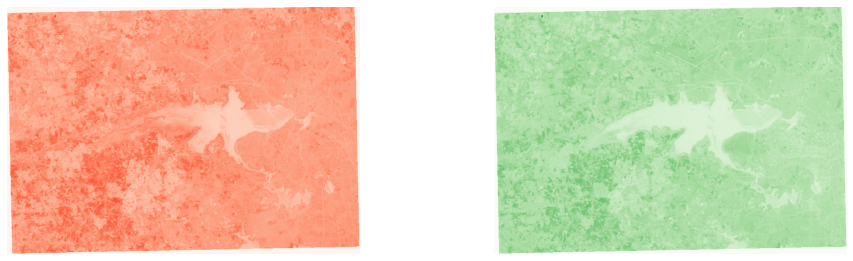

In [39]:
# List of band arrays
List_of_array=[Fdata5,Fdata6]
map = ['Reds','Greens']  # For color gun

# Visialize each band image
fig = plt.figure(figsize = (16,10))
i = 1
for k in List_of_array:
    plt.subplot(220+i)
    plt.axis('off')   
    plt.imshow(k,cmap = map[i-1])
    
    i = i+1
plt.show()

In [48]:
b5 = Fdata5.astype(np.int)
b6 = Fdata6.astype(np.int)
b5 = b5 
b6 = b6 
NBDI = (b6 - b5)/ (b6 + b5)

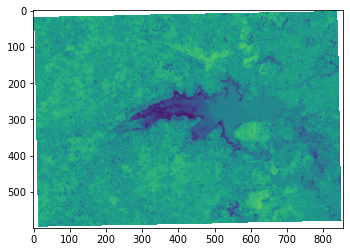

In [49]:
plt.imshow(NBDI)

In [35]:
# b,b2,b3 = List_of_array[0],List_of_array[1],List_of_array[2]

# rgb = np.dstack((b3,b2,b))
# plt.figure(figsize = (16,10))
# plt.axis('on')
# plt.imshow(rgb)
# plt.title('Corrected FCC:')
# plt.show()